In [123]:
import pandas as pd
import chart_studio
chart_studio.tools.set_credentials_file(username='username', api_key='api_key')
import chart_studio.plotly as py
import plotly.express as px
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import *

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # For creating plots
import matplotlib.ticker as mtick # For specifying the axes tick format 
import matplotlib.pyplot as plt


In [124]:
#파일 불러오기
file_path = '../Churn.xlsx'
data = pd.read_excel(file_path)

In [125]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   7043 non-null   int64  
 1   Age Group             7043 non-null   int64  
 2   Number of Dependents  7043 non-null   int64  
 3   Membership            7043 non-null   object 
 4   Satisfaction Score    7043 non-null   int64  
 5   Tech services         7043 non-null   int64  
 6   Streaming services    7043 non-null   int64  
 7   Combined Product      7043 non-null   int64  
 8   Contract              7043 non-null   object 
 9   Tenure in Months      7043 non-null   int64  
 10  Monthly Charge        7043 non-null   float64
 11  Total Revenue         7043 non-null   float64
 12  Churn Value           7043 non-null   int64  
dtypes: float64(2), int64(9), object(2)
memory usage: 715.4+ KB


In [126]:
data.isnull().sum()

Age                     0
Age Group               0
Number of Dependents    0
Membership              0
Satisfaction Score      0
Tech services           0
Streaming services      0
Combined Product        0
Contract                0
Tenure in Months        0
Monthly Charge          0
Total Revenue           0
Churn Value             0
dtype: int64

In [127]:
data.head()

,Age,Age Group,Number of Dependents,Membership,Satisfaction Score,Tech services,Streaming services,Combined Product,Contract,Tenure in Months,Monthly Charge,Total Revenue,Churn Value
0,78,70,0,None,3,1,1,2,Month-to-Month,1,39.65,59.65,1
1,74,70,1,Offer E,3,1,0,4,Month-to-Month,8,80.65,1024.10,1
2,71,70,3,Offer D,2,0,2,4,Month-to-Month,18,95.45,1910.88,1
3,78,70,1,Offer C,2,2,2,4,Month-to-Month,25,98.50,2995.07,1
4,80,80,1,Offer C,2,0,0,4,Month-to-Month,37,76.50,3102.36,1


In [128]:
#data['Membership'] = data['Membership'].map({'None': 0, 'Offer A': 1, 'Offer B': 2, 'Offer C': 3, 'Offer D': 4, 'Offer E': 5})
#data['Churn Value'] = data['Churn Value'].map({0: 'No', 1: 'Yes'})


In [129]:
data.head()

,Age,Age Group,Number of Dependents,Membership,Satisfaction Score,Tech services,Streaming services,Combined Product,Contract,Tenure in Months,Monthly Charge,Total Revenue,Churn Value
0,78,70,0,None,3,1,1,2,Month-to-Month,1,39.65,59.65,1
1,74,70,1,Offer E,3,1,0,4,Month-to-Month,8,80.65,1024.10,1
2,71,70,3,Offer D,2,0,2,4,Month-to-Month,18,95.45,1910.88,1
3,78,70,1,Offer C,2,2,2,4,Month-to-Month,25,98.50,2995.07,1
4,80,80,1,Offer C,2,0,0,4,Month-to-Month,37,76.50,3102.36,1


In [130]:
#더미 변수화
d_data = pd.get_dummies(data)
d_data.head()

,Age,Age Group,Number of Dependents,Satisfaction Score,Tech services,Streaming services,Combined Product,Tenure in Months,Monthly Charge,Total Revenue,Churn Value,Membership_None,Membership_Offer A,Membership_Offer B,Membership_Offer C,Membership_Offer D,Membership_Offer E,Contract_Month-to-Month,Contract_One Year,Contract_Two Year
0,78,70,0,3,1,1,2,1,39.65,59.65,1,1,0,0,0,0,0,1,0,0
1,74,70,1,3,1,0,4,8,80.65,1024.10,1,0,0,0,0,0,1,1,0,0
2,71,70,3,2,0,2,4,18,95.45,1910.88,1,0,0,0,0,1,0,1,0,0
3,78,70,1,2,2,2,4,25,98.50,2995.07,1,0,0,0,1,0,0,1,0,0
4,80,80,1,2,0,0,4,37,76.50,3102.36,1,0,0,0,1,0,0,1,0,0


<AxesSubplot:>

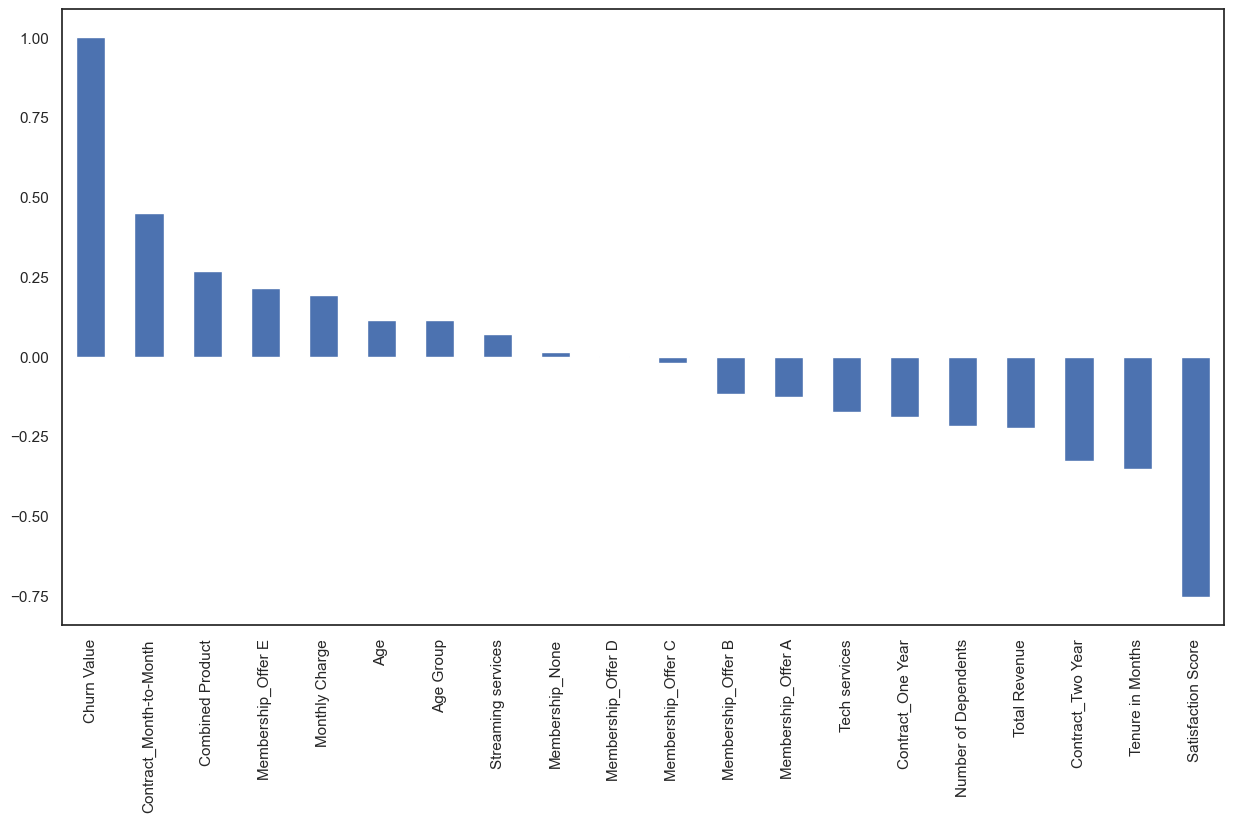

In [131]:
# Churn Value와 다른 열들 간의 상관 관계 계산 및 시각화
plt.figure(figsize=(15,8))
d_data.corr()['Churn Value'].sort_values(ascending = False).plot(kind='bar')

In [132]:
from sklearn.preprocessing import StandardScaler

# Churn Value 열을 타겟 변수로 설정. 종속 변수와 독립 변수 분리
y = d_data['Churn Value'].values
X = d_data.drop(columns=['Churn Value'])

# 학습 및 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=88)

# Standard 스케일링
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# SMOTE 오버샘플링
over = SMOTE(sampling_strategy='auto', random_state=88)
X_train_resampled, y_train_resampled = over.fit_resample(X_train_scaled, y_train)

print('SMOTE 적용 전 학습용 피처/레이블 데이터 세트: ', X_train.shape, y_train.shape)
print('SMOTE 적용 후 학습용 피처/레이블 데이터 세트: ', X_train_resampled.shape, y_train_resampled.shape)
print('SMOTE 적용 후 레이블 값 분포: \n', pd.Series(y_train_resampled).value_counts())


SMOTE 적용 전 학습용 피처/레이블 데이터 세트:  (4930, 19) (4930,)
SMOTE 적용 후 학습용 피처/레이블 데이터 세트:  (7220, 19) (7220,)
SMOTE 적용 후 레이블 값 분포: 
 0    3610
1    3610
dtype: int64


In [117]:
# 로지스틱 회귀 모델
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

lr_model = LogisticRegression()
lr_model.fit(X_train_resampled, y_train_resampled)
y_pred_lr = lr_model.predict(X_test)

accuracy_lr = accuracy_score(y_test, y_pred_lr)
confusion_lr = confusion_matrix(y_test, y_pred_lr)
report_lr = classification_report(y_test, y_pred_lr)

print("Logistic Regression 모델 정확도:", accuracy_lr)
print("로지스틱 회귀 모델 혼동 행렬:\n", confusion_lr)
print("로지스틱 회귀 모델 분류 보고서:\n", report_lr)

Logistic Regression 모델 정확도: 0.2867960246095599
로지스틱 회귀 모델 혼동 행렬:
 [[  57 1507]
 [   0  549]]
로지스틱 회귀 모델 분류 보고서:
               precision    recall  f1-score   support

           0       1.00      0.04      0.07      1564
           1       0.27      1.00      0.42       549

    accuracy                           0.29      2113
   macro avg       0.63      0.52      0.25      2113
weighted avg       0.81      0.29      0.16      2113



D:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [133]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# 로지스틱 회귀 모델 튜닝
lr_model = LogisticRegression()

# 하이퍼파라미터 그리드 설정
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100]
}

# GridSearchCV를 사용한 하이퍼파라미터 튜닝
grid_search = GridSearchCV(lr_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_resampled, y_train_resampled)

# 최적 하이퍼파라미터 출력
print("로지스틱 회귀 모델 최적 하이퍼파라미터:", grid_search.best_params_)

# 최적 모델로 재학습
best_lr_model = grid_search.best_estimator_
best_lr_model.fit(X_train_resampled, y_train_resampled)

# 테스트 데이터로 성능 평가
y_pred_lr = best_lr_model.predict(X_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
confusion_lr = confusion_matrix(y_test, y_pred_lr)
report_lr = classification_report(y_test, y_pred_lr)

print("로지스틱 회귀 모델 정확도:", accuracy_lr)
print("로지스틱 회귀 모델 혼동 행렬:\n", confusion_lr)
print("로지스틱 회귀 모델 분류 보고서:\n", report_lr)

로지스틱 회귀 모델 최적 하이퍼파라미터: {'C': 100, 'penalty': 'l2'}
로지스틱 회귀 모델 정확도: 0.8206341694273545
로지스틱 회귀 모델 혼동 행렬:
 [[1312  252]
 [ 127  422]]
로지스틱 회귀 모델 분류 보고서:
               precision    recall  f1-score   support

           0       0.91      0.84      0.87      1564
           1       0.63      0.77      0.69       549

    accuracy                           0.82      2113
   macro avg       0.77      0.80      0.78      2113
weighted avg       0.84      0.82      0.83      2113



D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, in _check_solver
    raise ValueError(
Valu

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


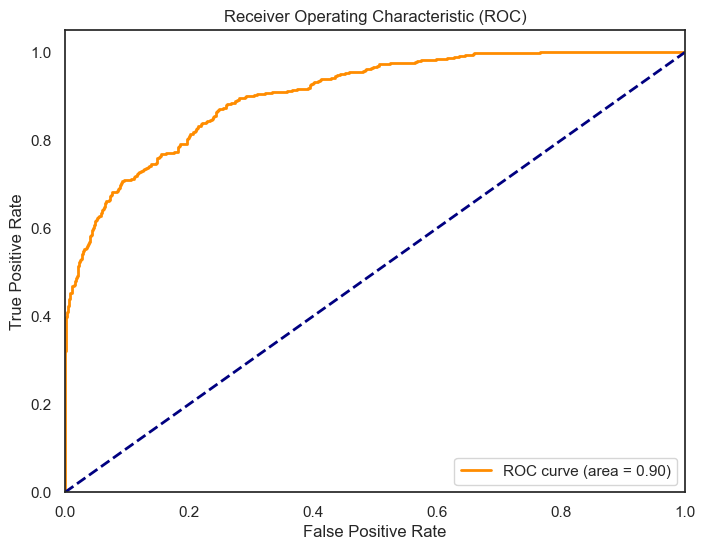

In [134]:
# ROC 곡선 그리기
y_score_lr = best_lr_model.decision_function(X_test)  # 로지스틱 회귀의 결정 함수 값
fpr, tpr, _ = roc_curve(y_test, y_score_lr)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

In [135]:

# 로지스틱 회귀 모델의 변수 가중치 추출
weights = lr_model.coef_[0]

# 변수 이름을 인덱스와 함께 저장
feature_names = list(X.columns)
weight_dict = dict(zip(feature_names, weights))

# 변수 가중치를 기준으로 내림차순 정렬
sorted_weights = sorted(weight_dict.items(), key=lambda x: x[1], reverse=True)

# 그래프 그리기
plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_weights)), [item[1] for item in sorted_weights], align='center')
plt.yticks(range(len(sorted_weights)), [item[0] for item in sorted_weights])
plt.xlabel('Variable Weight')
plt.title('Logistic Regression Variable Weights')
plt.gca().invert_yaxis()  # 상위 변수가 위로 올라오도록 뒤집기
plt.show()

AttributeError: 'LogisticRegression' object has no attribute 'coef_'

In [136]:
# 랜덤 포레스트 모델
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=99)
rf_model.fit(X_train_resampled, y_train_resampled)
y_pred_rf = rf_model.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
confusion_rf = confusion_matrix(y_test, y_pred_rf)
report_rf = classification_report(y_test, y_pred_rf)

print("Random Forest 모델 정확도:", accuracy_rf)
print("랜덤 포레스트 모델 혼동 행렬:\n", confusion_rf)
print("랜덤 포레스트 모델 분류 보고서:\n", report_rf)

Random Forest 모델 정확도: 0.7401798390913393
랜덤 포레스트 모델 혼동 행렬:
 [[1564    0]
 [ 549    0]]
랜덤 포레스트 모델 분류 보고서:
               precision    recall  f1-score   support

           0       0.74      1.00      0.85      1564
           1       0.00      0.00      0.00       549

    accuracy                           0.74      2113
   macro avg       0.37      0.50      0.43      2113
weighted avg       0.55      0.74      0.63      2113



D:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted 

In [137]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# 랜덤 포레스트 모델 튜닝
rf_model = RandomForestClassifier(random_state=42)

# 하이퍼파라미터 그리드 설정
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# GridSearchCV를 사용한 하이퍼파라미터 튜닝
grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_resampled, y_train_resampled)

# 최적 하이퍼파라미터 출력
print("랜덤 포레스트 모델 최적 하이퍼파라미터:", grid_search.best_params_)

# 최적 모델로 재학습
best_rf_model = grid_search.best_estimator_
best_rf_model.fit(X_train_resampled, y_train_resampled)

# 테스트 데이터로 성능 평가
y_pred_rf = best_rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
confusion_rf = confusion_matrix(y_test, y_pred_rf)
report_rf = classification_report(y_test, y_pred_rf)

print("랜덤 포레스트 모델 정확도:", accuracy_rf)
print("랜덤 포레스트 모델 혼동 행렬:\n", confusion_rf)
print("랜덤 포레스트 모델 분류 보고서:\n", report_rf)

랜덤 포레스트 모델 최적 하이퍼파라미터: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
랜덤 포레스트 모델 정확도: 0.7401798390913393
랜덤 포레스트 모델 혼동 행렬:
 [[1564    0]
 [ 549    0]]
랜덤 포레스트 모델 분류 보고서:
               precision    recall  f1-score   support

           0       0.74      1.00      0.85      1564
           1       0.00      0.00      0.00       549

    accuracy                           0.74      2113
   macro avg       0.37      0.50      0.43      2113
weighted avg       0.55      0.74      0.63      2113



D:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted 

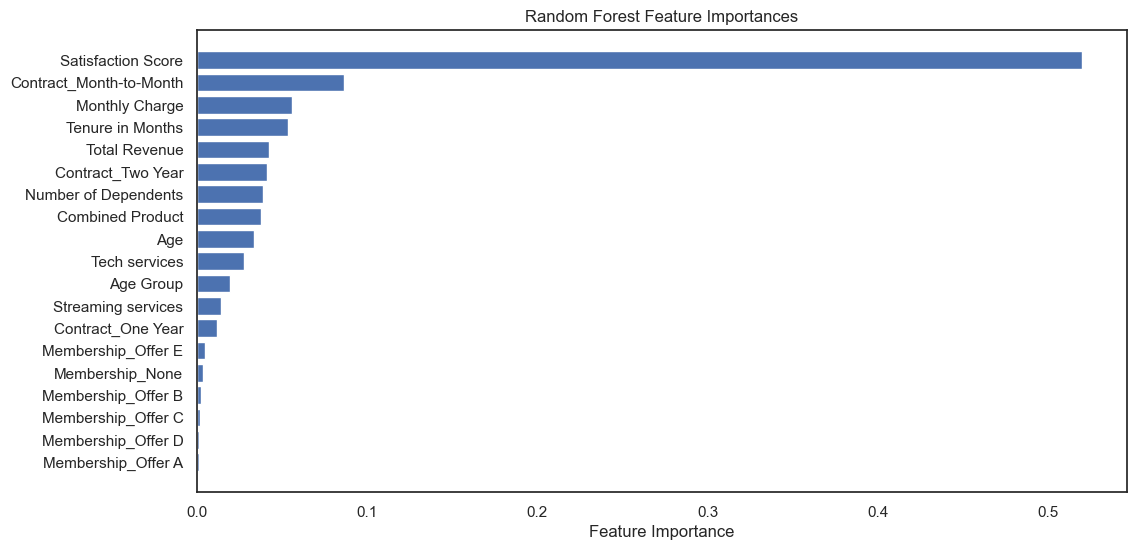

In [55]:
# 랜덤 포레스트 모델의 변수 중요도 추출
importances = rf_model.feature_importances_

# 변수 이름을 인덱스와 함께 저장
feature_names = list(X.columns)
importance_dict = dict(zip(feature_names, importances))

# 변수 중요도를 기준으로 내림차순 정렬
sorted_importances = sorted(importance_dict.items(), key=lambda x: x[1], reverse=True)

# 그래프 그리기
plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_importances)), [item[1] for item in sorted_importances], align='center')
plt.yticks(range(len(sorted_importances)), [item[0] for item in sorted_importances])
plt.xlabel('Feature Importance')
plt.title('Random Forest Feature Importances')
plt.gca().invert_yaxis()  # 상위 변수가 위로 올라오도록 뒤집기
plt.show()

In [49]:
# XGBoost
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

xgb_model = XGBClassifier(learning_rate=0.1, n_estimators=100, max_depth=3, random_state=42)
xgb_model.fit(X_train_resampled, y_train_resampled)
y_pred_xgb = xgb_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_xgb)
conf_matrix = confusion_matrix(y_test, y_pred_xgb)
class_report = classification_report(y_test, y_pred_xgb)

print("XGBoost 모델 정확도:", accuracy)
print("혼동 행렬:\n", conf_matrix)
print("분류 보고서:\n", class_report)


XGBoost 모델 정확도: 0.7368670137245622
혼동 행렬:
 [[1557    0]
 [ 556    0]]
분류 보고서:
               precision    recall  f1-score   support

           0       0.74      1.00      0.85      1557
           1       0.00      0.00      0.00       556

    accuracy                           0.74      2113
   macro avg       0.37      0.50      0.42      2113
weighted avg       0.54      0.74      0.63      2113



D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


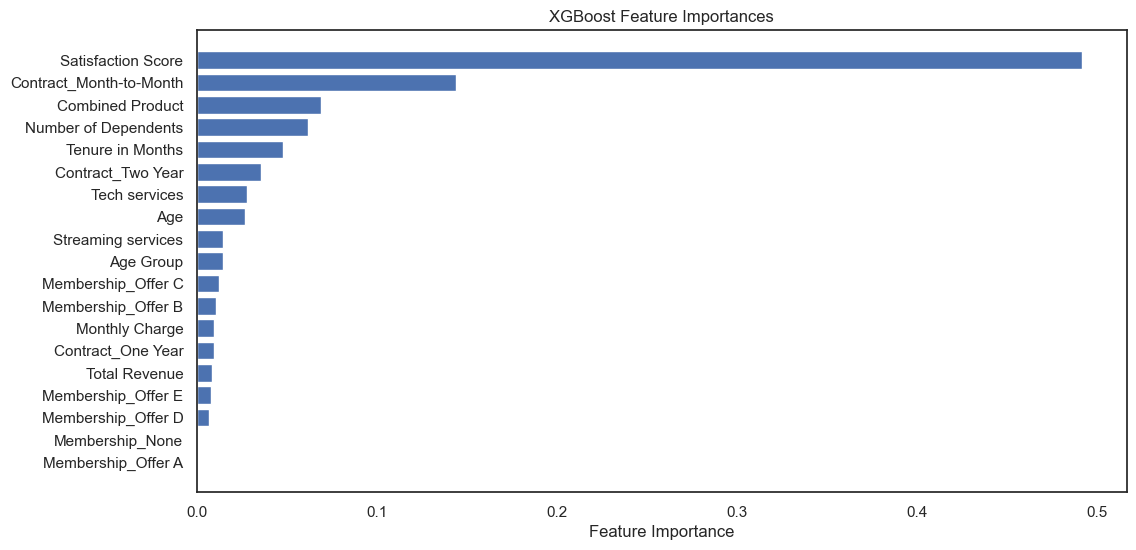

In [50]:
# XGBoost 모델의 변수 중요도 추출
importances = xgb_model.feature_importances_

# 변수 이름을 인덱스와 함께 저장
feature_names = list(X.columns)
importance_dict = dict(zip(feature_names, importances))

# 변수 중요도를 기준으로 내림차순 정렬
sorted_importances = sorted(importance_dict.items(), key=lambda x: x[1], reverse=True)

# 그래프 그리기
plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_importances)), [item[1] for item in sorted_importances], align='center')
plt.yticks(range(len(sorted_importances)), [item[0] for item in sorted_importances])
plt.xlabel('Feature Importance')
plt.title('XGBoost Feature Importances')
plt.gca().invert_yaxis()  # 상위 변수가 위로 올라오도록 뒤집기
plt.show()

In [119]:
# SVM
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

svm_model = SVC(kernel='linear', C=1.0, class_weight={0: 1, 1: 5})
svm_model.fit(X_train_resampled, y_train_resampled)
y_pred_svm = svm_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_svm)
conf_matrix = confusion_matrix(y_test, y_pred_svm)
class_report = classification_report(y_test, y_pred_svm)

print("SVM 모델 정확도:", accuracy)
print("혼동 행렬:\n", conf_matrix)
print("분류 보고서:\n", class_report)

SVM 모델 정확도: 0.2721249408424042
혼동 행렬:
 [[  29 1535]
 [   3  546]]
분류 보고서:
               precision    recall  f1-score   support

           0       0.91      0.02      0.04      1564
           1       0.26      0.99      0.42       549

    accuracy                           0.27      2113
   macro avg       0.58      0.51      0.23      2113
weighted avg       0.74      0.27      0.13      2113



D:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


In [120]:
from sklearn.model_selection import GridSearchCV

# 하이퍼파라미터 그리드 설정
param_grid = {'C': [0.1, 1, 10, 100], 'kernel': ['linear', 'rbf', 'poly', 'sigmoid']}

# 그리드 서치를 사용하여 최적의 하이퍼파라미터 찾기
svm = SVC(random_state=88)
grid_search = GridSearchCV(svm, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_resampled, y_train_resampled)

# 최적의 하이퍼파라미터 확인
best_params = grid_search.best_params_
print("최적의 하이퍼파라미터:", best_params)

# 최적의 모델로 예측
best_svm = grid_search.best_estimator_
y_pred_svm = best_svm.predict(X_test)

# 정확도 측정
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("튜닝된 SVM 모델 정확도:", accuracy_svm)

accuracy = accuracy_score(y_test, y_pred_svm)
conf_matrix = confusion_matrix(y_test, y_pred_svm)
class_report = classification_report(y_test, y_pred_svm)

print("SVM 모델 정확도:", accuracy)
print("혼동 행렬:\n", conf_matrix)
print("분류 보고서:\n", class_report)

최적의 하이퍼파라미터: {'C': 100, 'kernel': 'rbf'}
튜닝된 SVM 모델 정확도: 0.7401798390913393
SVM 모델 정확도: 0.7401798390913393
혼동 행렬:
 [[1564    0]
 [ 549    0]]
분류 보고서:
               precision    recall  f1-score   support

           0       0.74      1.00      0.85      1564
           1       0.00      0.00      0.00       549

    accuracy                           0.74      2113
   macro avg       0.37      0.50      0.43      2113
weighted avg       0.55      0.74      0.63      2113



D:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_

In [52]:
# AdaBoost
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

adaboost_model = AdaBoostClassifier(n_estimators=50, random_state=2)
adaboost_model.fit(X_train_resampled, y_train_resampled)
y_pred_adaboost = adaboost_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_adaboost)
conf_matrix = confusion_matrix(y_test, y_pred_adaboost)
class_report = classification_report(y_test, y_pred_adaboost)

print("AdaBoost 모델 정확도:", accuracy)
print("혼동 행렬:\n", conf_matrix)
print("분류 보고서:\n", class_report)

AdaBoost 모델 정확도: 0.7368670137245622
혼동 행렬:
 [[1557    0]
 [ 556    0]]
분류 보고서:
               precision    recall  f1-score   support

           0       0.74      1.00      0.85      1557
           1       0.00      0.00      0.00       556

    accuracy                           0.74      2113
   macro avg       0.37      0.50      0.42      2113
weighted avg       0.54      0.74      0.63      2113



D:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but AdaBoostClassifier was fitted without feature names
  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samp